In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('Data for Analysis - Candidate.xlsx', index_col = None)

In [3]:
df

,Main Topic,Sub Topic,Sentence,Overall User Rating,date,Main Topic Sentiment,Main Topic Score
0,functionality/feature,possible joins,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23 00:00:00,Positive,77.220482
1,functionality/feature,data analysis,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23 00:00:00,Positive,77.220482
2,functionality/feature,useful features,it also has great sorting capabilities.,3.5,2020-06-23 00:00:00,Positive,77.220482
3,functionality/feature,easy transformation,user access and data security is seamlessly ma...,3.5,2020-06-23 00:00:00,Positive,77.220482
4,functionality/feature,data analysis,very good for a starting point for data organi...,3.5,2020-06-23 00:00:00,Positive,77.220482
...,...,...,...,...,...,...,...
258,data source enhancement,data source,if something changes with the source data with...,4 Stars,2020-07-10 00:00:00,Positive,164.505944
259,data source enhancement,source system,if something changes with the source data with...,4 Stars,2020-07-10 00:00:00,Positive,164.505944
260,data source enhancement,data source,the tool is also easy to use and suggests many...,4 Stars,2020-07-10 00:00:00,Positive,164.505944
261,data source enhancement,source system,the tool is also easy to use and suggests many...,4 Stars,2020-07-10 00:00:00,Positive,164.505944


In [4]:
df.isnull().sum()

Main Topic              0
Sub Topic               0
Sentence                0
Overall User Rating     0
date                    0
Main Topic Sentiment    0
Main Topic Score        0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Main Topic Score,263.0,119.982398,101.774964,77.220482,77.220482,95.777408,116.991376,934.898959


In [6]:
df['Main Topic Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [7]:
df['Main Topic Sentiment'] = df['Main Topic Sentiment'].replace('Positive',1)
df['Main Topic Sentiment'] = df['Main Topic Sentiment'].replace('Negative',-1)
df['Main Topic Sentiment'] = df['Main Topic Sentiment'].replace('Neutral',0)

In [8]:
df.head()

,Main Topic,Sub Topic,Sentence,Overall User Rating,date,Main Topic Sentiment,Main Topic Score
0,functionality/feature,possible joins,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23 00:00:00,1,77.220482
1,functionality/feature,data analysis,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23 00:00:00,1,77.220482
2,functionality/feature,useful features,it also has great sorting capabilities.,3.5,2020-06-23 00:00:00,1,77.220482
3,functionality/feature,easy transformation,user access and data security is seamlessly ma...,3.5,2020-06-23 00:00:00,1,77.220482
4,functionality/feature,data analysis,very good for a starting point for data organi...,3.5,2020-06-23 00:00:00,1,77.220482


<b>Stripping the unwanted from Rating Column

In [9]:
df['Overall User Rating'].unique()

array([3.5, 4, 5, 4.5, 2.5, '5 Stars', '4 Stars', '3.5 Stars', '1 Star',
       '5 Star', '4.5 Stars', '1/2 Star'], dtype=object)

In [10]:
df['Overall User Rating'] = df['Overall User Rating'].astype(str)

In [11]:
df['Overall User Rating'] = df['Overall User Rating'].str.strip(' Stars')

In [12]:
df['Overall User Rating'] = df['Overall User Rating'].replace('1/2', '0.5')

In [13]:
df['Overall User Rating'] = df['Overall User Rating'].astype(float)

In [14]:
df.head(25)

,Main Topic,Sub Topic,Sentence,Overall User Rating,date,Main Topic Sentiment,Main Topic Score
0,functionality/feature,possible joins,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23 00:00:00,1,77.220482
1,functionality/feature,data analysis,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23 00:00:00,1,77.220482
2,functionality/feature,useful features,it also has great sorting capabilities.,3.5,2020-06-23 00:00:00,1,77.220482
3,functionality/feature,easy transformation,user access and data security is seamlessly ma...,3.5,2020-06-23 00:00:00,1,77.220482
4,functionality/feature,data analysis,very good for a starting point for data organi...,3.5,2020-06-23 00:00:00,1,77.220482
5,functionality/feature,radical transformations,your next ideal data transformation is suggest...,3.5,2020-06-23 00:00:00,1,77.220482
6,functionality/feature,predictive transformation,your next ideal data transformation is suggest...,3.5,2020-06-23 00:00:00,1,77.220482
7,functionality/feature,easy transformation,"however, you can easily change the size of sam...",3.5,2020-06-23 00:00:00,1,77.220482
8,functionality/feature,data analysis,"process data stored in cloud storage, bigquery...",3.5,2020-06-23 00:00:00,1,77.220482
9,functionality/feature,data analysis,so you get to skip the time-consuming work of ...,3.5,2020-06-23 00:00:00,1,77.220482


<b>Extracting the Date and Month from DateStamp

In [15]:
from datetime import datetime as dt

In [16]:
df.head()

,Main Topic,Sub Topic,Sentence,Overall User Rating,date,Main Topic Sentiment,Main Topic Score
0,functionality/feature,possible joins,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23 00:00:00,1,77.220482
1,functionality/feature,data analysis,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23 00:00:00,1,77.220482
2,functionality/feature,useful features,it also has great sorting capabilities.,3.5,2020-06-23 00:00:00,1,77.220482
3,functionality/feature,easy transformation,user access and data security is seamlessly ma...,3.5,2020-06-23 00:00:00,1,77.220482
4,functionality/feature,data analysis,very good for a starting point for data organi...,3.5,2020-06-23 00:00:00,1,77.220482


In [17]:
df['date'] = df['date'].astype(str)

In [18]:
df['date'] = df['date'].str.strip(' 00:00:00')

In [19]:
df.head()

,Main Topic,Sub Topic,Sentence,Overall User Rating,date,Main Topic Sentiment,Main Topic Score
0,functionality/feature,possible joins,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23,1,77.220482
1,functionality/feature,data analysis,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23,1,77.220482
2,functionality/feature,useful features,it also has great sorting capabilities.,3.5,2020-06-23,1,77.220482
3,functionality/feature,easy transformation,user access and data security is seamlessly ma...,3.5,2020-06-23,1,77.220482
4,functionality/feature,data analysis,very good for a starting point for data organi...,3.5,2020-06-23,1,77.220482


In [20]:
type(df['date'][80])
df['date'][55]

'2019-04-16'

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Main Topic            263 non-null    object 
 1   Sub Topic             263 non-null    object 
 2   Sentence              263 non-null    object 
 3   Overall User Rating   263 non-null    float64
 4   date                  263 non-null    object 
 5   Main Topic Sentiment  263 non-null    int64  
 6   Main Topic Score      263 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.5+ KB


In [22]:
df['date'][99]
df['date'][99] = df['date'][99].replace('Jul 15, 2020(Original Apr 28, 2020)','2020-07-15')

<ipython-input-22-cc8d471b051e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][99] = df['date'][99].replace('Jul 15, 2020(Original Apr 28, 2020)','2020-07-15')


In [23]:
df['date'][99]

'2020-07-15'

In [24]:
type(pd.to_datetime(df['date']))

pandas.core.series.Series

In [25]:
df["date"]= pd.to_datetime(df["date"])

In [26]:
df.head()

,Main Topic,Sub Topic,Sentence,Overall User Rating,date,Main Topic Sentiment,Main Topic Score
0,functionality/feature,possible joins,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23,1,77.220482
1,functionality/feature,data analysis,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23,1,77.220482
2,functionality/feature,useful features,it also has great sorting capabilities.,3.5,2020-06-23,1,77.220482
3,functionality/feature,easy transformation,user access and data security is seamlessly ma...,3.5,2020-06-23,1,77.220482
4,functionality/feature,data analysis,very good for a starting point for data organi...,3.5,2020-06-23,1,77.220482


In [27]:
list_months=[]
list_months

[]

In [28]:
len(df['date'])

263

In [29]:
for i in range(len(df['date'])):
    list_months.append(df['date'][i].month)
    print(df['date'][i].month)

6
6
6
6
6
6
6
6
6
6
6
6
6
3
3
3
3
3
3
3
11
11
11
11
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
7
7
7
7
7
7
7
7
7
5
5
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


In [30]:
len(list_months)

263

In [31]:
df['New Month'] = list_months

In [32]:
np.unique(list_months)

array([ 3,  4,  5,  6,  7, 11])

In [33]:
df.head()

,Main Topic,Sub Topic,Sentence,Overall User Rating,date,Main Topic Sentiment,Main Topic Score,New Month
0,functionality/feature,possible joins,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23,1,77.220482,6
1,functionality/feature,data analysis,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23,1,77.220482,6
2,functionality/feature,useful features,it also has great sorting capabilities.,3.5,2020-06-23,1,77.220482,6
3,functionality/feature,easy transformation,user access and data security is seamlessly ma...,3.5,2020-06-23,1,77.220482,6
4,functionality/feature,data analysis,very good for a starting point for data organi...,3.5,2020-06-23,1,77.220482,6


In [34]:
df.head()

,Main Topic,Sub Topic,Sentence,Overall User Rating,date,Main Topic Sentiment,Main Topic Score,New Month
0,functionality/feature,possible joins,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23,1,77.220482,6
1,functionality/feature,data analysis,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23,1,77.220482,6
2,functionality/feature,useful features,it also has great sorting capabilities.,3.5,2020-06-23,1,77.220482,6
3,functionality/feature,easy transformation,user access and data security is seamlessly ma...,3.5,2020-06-23,1,77.220482,6
4,functionality/feature,data analysis,very good for a starting point for data organi...,3.5,2020-06-23,1,77.220482,6


In [35]:
#df.drop('Months', axis=1, inplace=True) #Deleting in Pandas

In [36]:
df.head(60)

,Main Topic,Sub Topic,Sentence,Overall User Rating,date,Main Topic Sentiment,Main Topic Score,New Month
0,functionality/feature,possible joins,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23,1,77.220482,6
1,functionality/feature,data analysis,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23,1,77.220482,6
2,functionality/feature,useful features,it also has great sorting capabilities.,3.5,2020-06-23,1,77.220482,6
3,functionality/feature,easy transformation,user access and data security is seamlessly ma...,3.5,2020-06-23,1,77.220482,6
4,functionality/feature,data analysis,very good for a starting point for data organi...,3.5,2020-06-23,1,77.220482,6
5,functionality/feature,radical transformations,your next ideal data transformation is suggest...,3.5,2020-06-23,1,77.220482,6
6,functionality/feature,predictive transformation,your next ideal data transformation is suggest...,3.5,2020-06-23,1,77.220482,6
7,functionality/feature,easy transformation,"however, you can easily change the size of sam...",3.5,2020-06-23,1,77.220482,6
8,functionality/feature,data analysis,"process data stored in cloud storage, bigquery...",3.5,2020-06-23,1,77.220482,6
9,functionality/feature,data analysis,so you get to skip the time-consuming work of ...,3.5,2020-06-23,1,77.220482,6


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Main Topic            263 non-null    object        
 1   Sub Topic             263 non-null    object        
 2   Sentence              263 non-null    object        
 3   Overall User Rating   263 non-null    float64       
 4   date                  263 non-null    datetime64[ns]
 5   Main Topic Sentiment  263 non-null    int64         
 6   Main Topic Score      263 non-null    float64       
 7   New Month             263 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 16.6+ KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall User Rating,263.0,4.467681,0.748982,0.500000,4.250000,4.500000,5.000000,5.000000
Main Topic Sentiment,263.0,0.684411,0.711964,-1.000000,1.000000,1.000000,1.000000,1.000000
Main Topic Score,263.0,119.982398,101.774964,77.220482,77.220482,95.777408,116.991376,934.898959
New Month,263.0,6.475285,1.352957,3.000000,7.000000,7.000000,7.000000,11.000000


In [39]:
df['Main Topic Score'] = df['Main Topic Score'].round(decimals=2)

In [40]:
df.head()

,Main Topic,Sub Topic,Sentence,Overall User Rating,date,Main Topic Sentiment,Main Topic Score,New Month
0,functionality/feature,possible joins,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23,1,77.22,6
1,functionality/feature,data analysis,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23,1,77.22,6
2,functionality/feature,useful features,it also has great sorting capabilities.,3.5,2020-06-23,1,77.22,6
3,functionality/feature,easy transformation,user access and data security is seamlessly ma...,3.5,2020-06-23,1,77.22,6
4,functionality/feature,data analysis,very good for a starting point for data organi...,3.5,2020-06-23,1,77.22,6


In [41]:
df['Overall User Rating'].value_counts()

5.0    121
4.5     76
3.5     34
4.0     25
1.0      3
0.5      2
2.5      2
Name: Overall User Rating, dtype: int64

In [42]:
df['Main Topic'].unique()

array(['functionality/feature', 'customer relations/service',
       'data source enhancement', 'ease of use', 'performance',
       'user interface', 'assistance', 'price', 'scalability',
       'visualization', 'software quality', 'technical issues',
       'helpful documentation', 'feature requests'], dtype=object)

In [43]:
df['Sub Topic'].unique()

array(['possible joins', 'data analysis', 'useful features',
       'easy transformation', 'radical transformations',
       'predictive transformation', 'customer service',
       'customer support', 'cloud version', 'easy preprocessing',
       'easier convenient', 'easy deployment', 'preparation process',
       'faster time', 'support team', 'clunky interface',
       'beneficial information', 'data source', 'packed feature',
       'rich product', 'effective tool', 'efficient access',
       'scalable solution', 'scalable tool', 'scalable infrastructure',
       'intuitive workflow', 'invaluable tool', 'intuitive interface',
       'extremely powerful', 'friendly site', 'rapid ability',
       'quick transformation', 'fast process', 'fast processing',
       'intelligent service', 'accurate result', 'direct integrations',
       'community support', 'basic cleansing', 'favorite feature',
       'pleasant experience', 'easy formatting', 'fresh visualization',
       'easy visualiza

In [44]:
df.drop('New Month', axis=1, inplace=True)

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

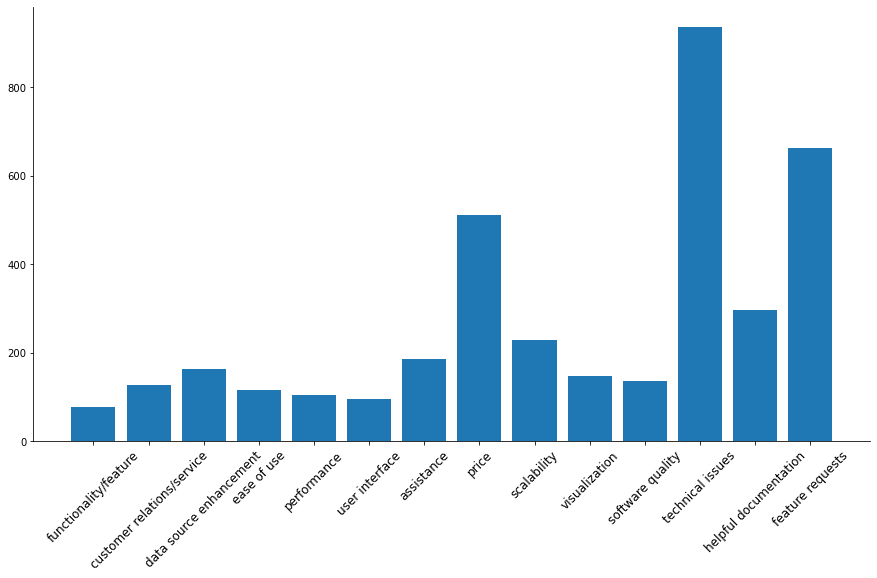

In [46]:
plt.figure(figsize=(15,8))

plt.bar(x=df['Main Topic'],
       height=df['Main Topic Score']
       )
sns.despine()
plt.xticks(rotation=45, fontsize=12)

plt.show()

<b>Sentiment ANalysis

In [76]:
df.head()

sentiment_columns=pd.get_dummies(df['Main Topic Sentiment'])
sentiment_columns.loc[238:244,-1]
        

238    0
239    0
240    0
241    0
242    0
243    0
244    0
Name: -1, dtype: uint8

In [66]:
P_Sentiment = sentiment_columns.loc[:,1]

In [67]:
N_Sentiment = sentiment_columns.loc[:,-1]

In [77]:
df = pd.concat([df, P_Sentiment, N_Sentiment], axis=1)

In [89]:
df.columns = ['Main Topic', 'Sub Topic', 'Sentence', 'Overall User Rating', 'date', 'Main Topic Sentiment', 'Main Topic Score', 'Positive Sentiment', 'Negative Sentiment']

In [91]:
df.columns
df.head()

,Main Topic,Sub Topic,Sentence,Overall User Rating,date,Main Topic Sentiment,Main Topic Score,Positive Sentiment,Negative Sentiment
0,functionality/feature,possible joins,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23,1,77.22,1,0
1,functionality/feature,data analysis,"cloud dataprep automatically detects schemas, ...",3.5,2020-06-23,1,77.22,1,0
2,functionality/feature,useful features,it also has great sorting capabilities.,3.5,2020-06-23,1,77.22,1,0
3,functionality/feature,easy transformation,user access and data security is seamlessly ma...,3.5,2020-06-23,1,77.22,1,0
4,functionality/feature,data analysis,very good for a starting point for data organi...,3.5,2020-06-23,1,77.22,1,0


In [93]:
df['Main Topic Sentiment'].value_counts()

 1    218
-1     38
 0      7
Name: Main Topic Sentiment, dtype: int64

<b>To_Excel

In [92]:
df.to_excel('Data for Analysis_Final.xlsx')